In [2]:
!pip install -q kaggle 

In [3]:
!mkdir ~/.kaggle

In [4]:
!touch ~/.kaggle/kaggle.json


In [5]:
api_token = {"username":"vijayananth1","key":"0c4b6f988000b9fe901d66a6cf427a2c"}


In [6]:
import json 

with open('/root/.kaggle/kaggle.json','w') as file:
    json.dump(api_token,file)

In [7]:
!chmod 600 ~/.kaggle/kaggle.json

In [8]:
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia --force

100%|█████████████████████████████████████▉| 2.29G/2.29G [01:32<00:00, 13.9MB/s]
100%|██████████████████████████████████████| 2.29G/2.29G [01:32<00:00, 26.6MB/s]


In [9]:
import zipfile
with zipfile.ZipFile('./chest-xray-pneumonia.zip', 'r') as zip_ref:
    zip_ref.extractall('./data')

In [18]:
import glob
import random
import matplotlib.pyplot as plt

def get_random_image(dir,condition):
    placeholder = ''
    if condition=='n':
        placeholder='NORMAL'
    elif condition=='p':
        placeholder='PNEUMONIA'
    else:
        raise Exception("Sorry, invalid condition")
        
    folder=f"./data/chest_xray/{dir}/{placeholder}/*.jpeg"
    img_paths=glob.glob(folder)
    max_length=len(img_paths)
    randomNumber=random.randint(0,max_length)
    
    for index,item in enumerate(img_paths,start=1):
        if index==randomNumber:
            print(index,item)
            image=plt.imread(item)
            readyImage=plt.imshow(image)
            return readyImage

8 ./data/chest_xray/val/NORMAL/NORMAL2-IM-1427-0001.jpeg


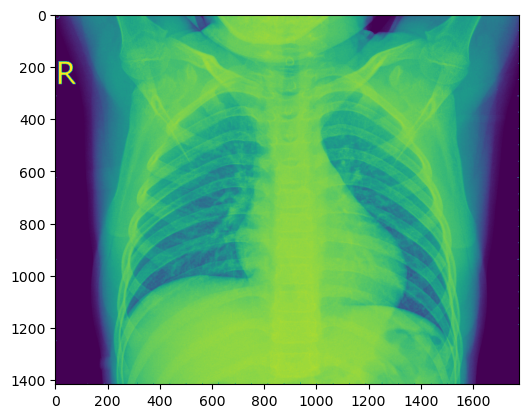

In [27]:
get_random_image("val","n")

In [2]:
import glob
import matplotlib.pyplot as plt
from PIL import Image

folder = './data/chest_xray/train/*/*.jpeg'

counterPneu = 0
counterNormal = 0

img_paths = glob.glob(folder)

for i in img_paths:
    if "person" in i:
        full_size_image = Image.open(i)
        im = full_size_image.resize((224,224))
        plt.imsave(fname='./data/chest_xray/train' + '/train_pneumonia' + str(counterPneu) + '.jpeg', arr=im, format='jpeg', cmap='gray')
        counterPneu+=1
    else:
        full_size_image = Image.open(i)
        im = full_size_image.resize((224,224))
        plt.imsave(fname='./data/chest_xray/train' + '/train_normal' + str(counterNormal) + '.jpeg', arr=im, format='jpeg', cmap='gray')
        counterNormal+=1
        

In [3]:
import glob
import matplotlib.pyplot as plt
from PIL import Image

folder = './data/chest_xray/test/*/*.jpeg'

counterPneu = 0
counterNormal = 0

img_paths = glob.glob(folder)

for i in img_paths:
    if "person" in i:
        full_size_image = Image.open(i)
        im = full_size_image.resize((224,224))
        plt.imsave(fname='./data/chest_xray/test' + '/test_pneumonia' + str(counterPneu) + '.jpeg', arr=im, format='jpeg', cmap='gray')
        counterPneu+=1
    else:
        full_size_image = Image.open(i)
        im = full_size_image.resize((224,224))
        plt.imsave(fname='./data/chest_xray/test' + '/test_normal' + str(counterNormal) + '.jpeg', arr=im, format='jpeg', cmap='gray')
        counterNormal+=1
        

In [4]:
import glob
import matplotlib.pyplot as plt
from PIL import Image

folder = './data/chest_xray/val/*/*.jpeg'

counterPneu = 0
counterNormal = 0

img_paths = glob.glob(folder)

for i in img_paths:
    if "person" in i:
        full_size_image = Image.open(i)
        im = full_size_image.resize((224,224))
        plt.imsave(fname='./data/chest_xray/val' + '/val_pneumonia' + str(counterPneu) + '.jpeg', arr=im, format='jpeg', cmap='gray')
        counterPneu+=1
    else:
        full_size_image = Image.open(i)
        im = full_size_image.resize((224,224))
        plt.imsave(fname='./data/chest_xray/val' + '/val_normal' + str(counterNormal) + '.jpeg', arr=im, format='jpeg', cmap='gray')
        counterNormal+=1
        

In [8]:
import glob
import pandas as pd

folder = './data/chest_xray/*/*.jpeg'

category = []
condition_of_lung = []
filenames = []

all_files = glob.glob(folder)

for filename in all_files:
    if "train" in filename:
        if "pneumonia" in filename:
            category.append("train")
            filenames.append(filename)
            condition_of_lung.append("pneumonia")
        elif "normal" in filename:
            category.append("train")
            filenames.append(filename)
            condition_of_lung.append("normal")
    elif "test" in filename:
        if "pneumonia" in filename:
            category.append("test")
            filenames.append(filename)
            condition_of_lung.append("pneumonia")
        elif "normal" in filename:
            category.append("test")
            filenames.append(filename)
            condition_of_lung.append("normal")
    elif "val" in filename:
        if "pneumonia" in filename:
            category.append("val")
            filenames.append(filename)
            condition_of_lung.append("pneumonia")
        elif "normal" in filename:
            category.append("val")
            filenames.append(filename)
            condition_of_lung.append("normal")
            
all_data_df = pd.DataFrame({"dataset type": category, "x-ray result":condition_of_lung, "filename":filenames})
print(all_data_df.head())

  dataset type x-ray result                                       filename
0         test       normal       ./data/chest_xray/test/test_normal4.jpeg
1         test    pneumonia    ./data/chest_xray/test/test_pneumonia1.jpeg
2         test    pneumonia  ./data/chest_xray/test/test_pneumonia359.jpeg
3         test    pneumonia  ./data/chest_xray/test/test_pneumonia197.jpeg
4         test       normal     ./data/chest_xray/test/test_normal103.jpeg


In [9]:
print(category[0])
print(condition_of_lung[0])
print(filenames[0])

test
normal
./data/chest_xray/test/test_normal4.jpeg


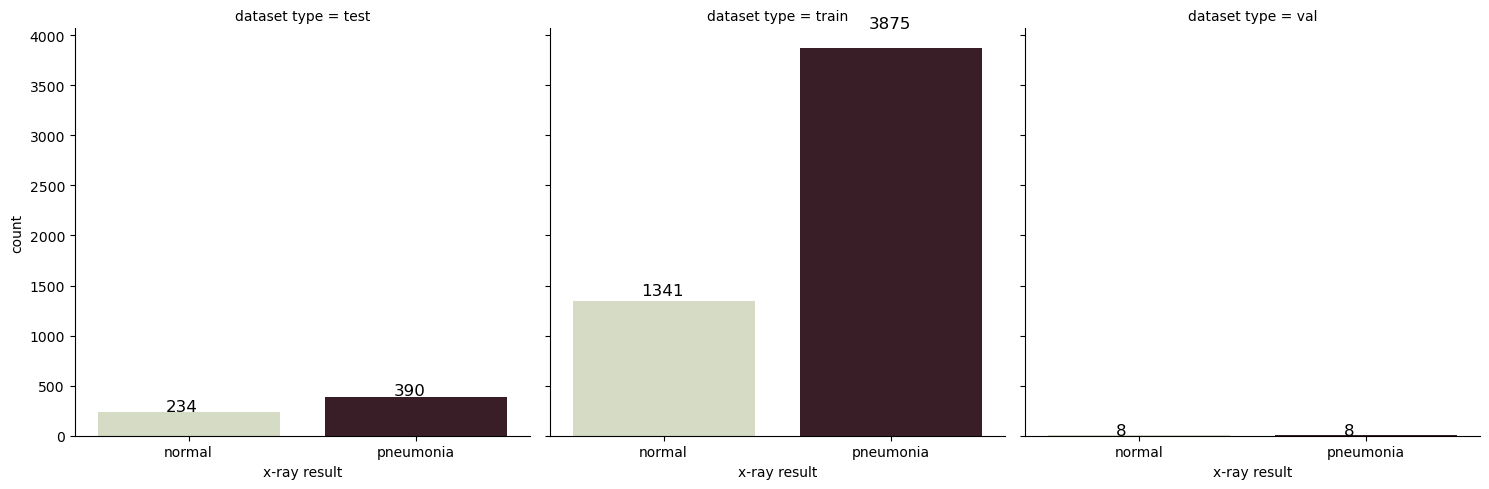

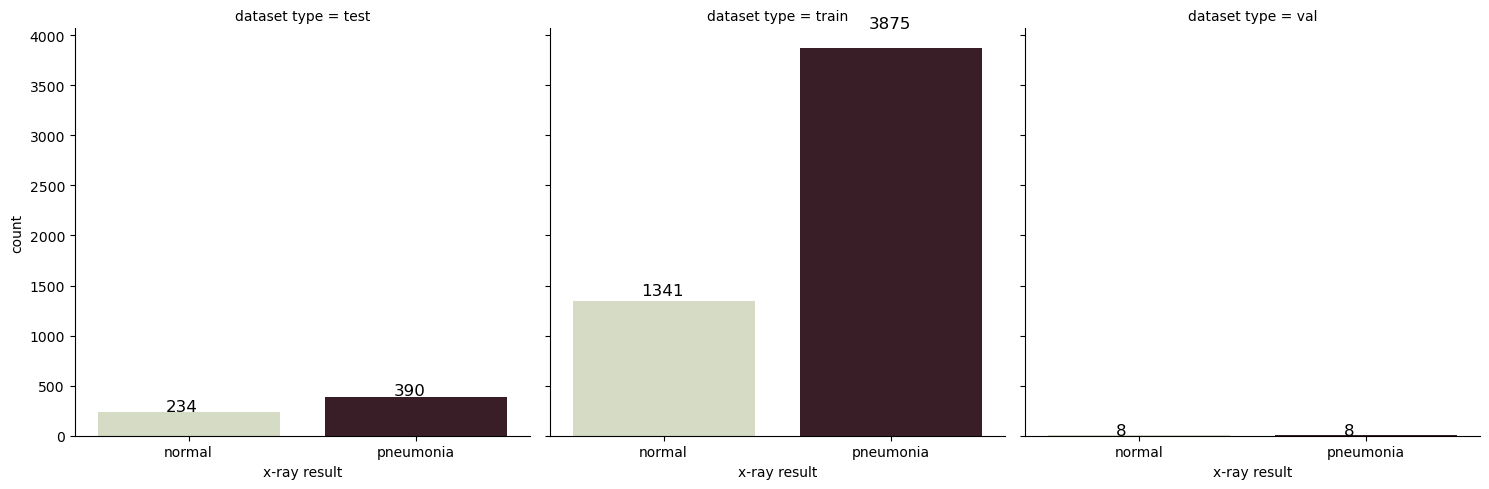

In [27]:
import seaborn as sns

g=sns.catplot(x="x-ray result",col="dataset type",kind="count",palette="ch:.55",data=all_data_df,legend=True)

for i in range(0,3):
    ax=g.facet_axis(0,i)
    for p in ax.patches:
        ax.text(p.get_x()+0.3,
        p.get_height()*1.05,
        '{0:.0f}'.format(p.get_height()),
        color='black',
        rotation='horizontal',
        size='large')
plt.show()

In [28]:
import glob
import pandas as pd
import os
train_folder='./data/chest_xray/train/*.jpeg'
train_df_lst=pd.DataFrame(columns=['labels','s3_path'],dtype=object)
train_imgs_path=glob.glob(train_folder)
counter=0
class_arg=''

for i in train_imgs_path:
    if "pneumonia" in i:
        class_arg=1
    else:
        class_arg=0
    train_df_lst.loc[counter]=[class_arg,os.path.basename(i)]
    counter+=1
print(train_df_lst.head())

   labels                   s3_path
0       0     train_normal1203.jpeg
1       1  train_pneumonia3349.jpeg
2       1   train_pneumonia478.jpeg
3       1  train_pneumonia1567.jpeg
4       1  train_pneumonia2296.jpeg


In [29]:
import glob
import pandas as pd
import os
test_folder='./data/chest_xray/test/*.jpeg'
test_df_lst=pd.DataFrame(columns=['labels','s3_path'],dtype=object)
test_imgs_path=glob.glob(test_folder)
counter=0
class_arg=''

for i in test_imgs_path:
    if "pneumonia" in i:
        class_arg=1
    else:
        class_arg=0
    test_df_lst.loc[counter]=[class_arg,os.path.basename(i)]
    counter+=1
print(test_df_lst.head())

   labels                 s3_path
0       0       test_normal4.jpeg
1       1    test_pneumonia1.jpeg
2       1  test_pneumonia359.jpeg
3       1  test_pneumonia197.jpeg
4       0     test_normal103.jpeg


In [30]:
def save_to_lst(df,prefix):
    return df[["labels","s3_path"]].to_csv(
    f"{prefix}.lst", sep='\t',index=True,header=False
    )

save_to_lst(train_df_lst.copy(),"train")
save_to_lst(test_df_lst.copy(),"test")

In [31]:
bucket='ai-chest-xray-bucket'
print("bucket:{}".format(bucket))
region='us-east-2'
print("region:{}".format(region))
roleArn='arn:aws:s3:::ai-chest-xray-bucket'
print("roleArn:{}".format(roleArn))


bucket:ai-chest-xray-bucket
region:us-east-2
roleArn:arn:aws:s3:::ai-chest-xray-bucket


In [3]:
import os

os.environ["DEFAULT_S3_BUCKET"]=bucket

In [4]:
!aws s3 sync ./data/chest_xray/train s3://${DEFAULT_S3_BUCKET}/train/


upload: data/chest_xray/train/train_normal1.jpeg to s3://ai-chest-xray-bucket/train/train_normal1.jpeg
upload: data/chest_xray/train/train_normal1003.jpeg to s3://ai-chest-xray-bucket/train/train_normal1003.jpeg
upload: data/chest_xray/train/train_normal0.jpeg to s3://ai-chest-xray-bucket/train/train_normal0.jpeg
upload: data/chest_xray/train/train_normal1009.jpeg to s3://ai-chest-xray-bucket/train/train_normal1009.jpeg
upload: data/chest_xray/train/train_normal10.jpeg to s3://ai-chest-xray-bucket/train/train_normal10.jpeg
upload: data/chest_xray/train/train_normal1007.jpeg to s3://ai-chest-xray-bucket/train/train_normal1007.jpeg
upload: data/chest_xray/train/train_normal1001.jpeg to s3://ai-chest-xray-bucket/train/train_normal1001.jpeg
upload: data/chest_xray/train/train_normal101.jpeg to s3://ai-chest-xray-bucket/train/train_normal101.jpeg
upload: data/chest_xray/train/train_normal100.jpeg to s3://ai-chest-xray-bucket/train/train_normal100.jpeg
upload: data/chest_xray/train/train_nor

In [5]:
!aws s3 sync ./data/chest_xray/test s3://${DEFAULT_S3_BUCKET}/test/


upload: data/chest_xray/test/test_normal100.jpeg to s3://ai-chest-xray-bucket/test/test_normal100.jpeg
upload: data/chest_xray/test/test_normal102.jpeg to s3://ai-chest-xray-bucket/test/test_normal102.jpeg
upload: data/chest_xray/test/test_normal107.jpeg to s3://ai-chest-xray-bucket/test/test_normal107.jpeg
upload: data/chest_xray/test/test_normal0.jpeg to s3://ai-chest-xray-bucket/test/test_normal0.jpeg
upload: data/chest_xray/test/test_normal10.jpeg to s3://ai-chest-xray-bucket/test/test_normal10.jpeg
upload: data/chest_xray/test/test_normal101.jpeg to s3://ai-chest-xray-bucket/test/test_normal101.jpeg
upload: data/chest_xray/test/test_normal1.jpeg to s3://ai-chest-xray-bucket/test/test_normal1.jpeg
upload: data/chest_xray/test/test_normal105.jpeg to s3://ai-chest-xray-bucket/test/test_normal105.jpeg
upload: data/chest_xray/test/test_normal111.jpeg to s3://ai-chest-xray-bucket/test/test_normal111.jpeg
upload: data/chest_xray/test/test_normal103.jpeg to s3://ai-chest-xray-bucket/test/

In [6]:
import boto3

boto3.Session().resource('s3').Bucket(bucket).Object("train.lst").upload_file('./train.lst')

In [7]:
boto3.Session().resource('s3').Bucket(bucket).Object("test.lst").upload_file('./test.lst')

In [8]:
print(region)


us-east-2


In [32]:
import sagemaker
from sagemaker import image_uris
import boto3
from sagemaker import get_execution_role
sess=sagemaker.Session()

algorithm_image=image_uris.retrieve(
    region=boto3.Session().region_name,
    framework="image-classification"
)

s3_output_location=f"s3://{bucket}/models/image_model"
print(algorithm_image)

825641698319.dkr.ecr.us-east-2.amazonaws.com/image-classification:1


In [33]:
role=get_execution_role()
print(role)

arn:aws:iam::277170186111:role/service-role/AmazonSageMaker-ExecutionRole-20230824T021888


In [12]:
import sagemaker
img_classifier_model=sagemaker.estimator.Estimator(
    algorithm_image,
    role=role,
    instance_count=1,
    instance_type="ml.p2.xlarge",
    volume_size=50,
    max_run=432000,
    input_mode="File",
    output_path=s3_output_location,
    sagemaker_session=sess
)
print(img_classifier_model)

In [13]:
import glob

In [14]:
import glob

count=0

for filepath in glob.glob('.data/chest_xray/train/*.jpeg'):
    count+=1
print(count)

0


In [15]:
import glob 
count=0

for filepath in glob.glob('./data/chest_xray/train/*.jpeg'):
    count+=1
print(count)

5216


In [16]:
img_classifier_model.set_hyperparameters(
image_shape='3,224,224',
num_classes=2,
use_pretrained_model=1,
num_training_samples=count,
augmentation_type='crop_color_transform',
epochs=15,
early_stopping=True,
early_stopping_min_epochs=8,
early_stopping_tolerance=0.0,
early_stopping_patience=5,
lr_scheduler_factor=0.1,
lr_scheduler_step='8,10,12')

In [17]:
from sagemaker.tuner import CategoricalParameter,ContinuousParameter,HyperparameterTuner

hyperparameter_ranges={
    "learning_rate":ContinuousParameter(0.01,0.1),
    "mini_batch_size":CategoricalParameter([8,16,32]),
    "optimizer":CategoricalParameter(["sgd","adam"])
}

In [18]:
objective_metric_name="validation:accuracy"
objective_type="Maximize"
max_jobs=4
max_parallel_jobs=1


In [19]:
tuner=HyperparameterTuner(estimator=img_classifier_model,
                         objective_metric_name=objective_metric_name,
                         hyperparameter_ranges=hyperparameter_ranges,
                         objective_type=objective_type,
                         max_jobs=max_jobs,
                         max_parallel_jobs=max_parallel_jobs  
                         )

In [20]:
from sagemaker.session import TrainingInput

model_inputs={
    "train":sagemaker.inputs.TrainingInput(s3_data=f"s3://{bucket}/train/",content_type="application/x-image"),
    "validation":sagemaker.inputs.TrainingInput(s3_data=f"s3://{bucket}/test/",content_type="application/x-image"),
    "train_lst":sagemaker.inputs.TrainingInput(s3_data=f"s3://{bucket}/train.lst",content_type="application/x-image"),
    "validation_lst":sagemaker.inputs.TrainingInput(s3_data=f"s3://{bucket}/test.lst",content_type="application/x-image"),
}

In [21]:
import time 
job_name_prefix="classifier"
timestamp=time.strftime("-%Y-%m-%d-%H-%M-%S",time.gmtime())
job_name=job_name_prefix+timestamp
                        

In [ ]:
tuner.fit(inputs=model_inputs,job_name=job_name,logs=True)

No finished training job found associated with this estimator. Please make sure this estimator is only used for building workflow config


...................................................................................................................................................................................................................................................................................................................................................................................................................................

In [18]:
import sagemaker
from sagemaker import get_execution_role


In [19]:
role=get_execution_role()


In [34]:
model=sagemaker.model.Model(
image_uri=algorithm_image,
model_data='s3://ai-chest-xray-bucket/models/image_model/classifier-2023-08-25-06-55-36-004-60433780/output/model.tar.gz',
role=role)

In [35]:
endpoint_name='image-classifier-Pneumonia3'

In [36]:
deployment=model.deploy(
initial_instance_count=1,
instance_type='ml.m4.xlarge',
endpoint_name=endpoint_name)

----------!

In [25]:
from sagemaker.predictor import Predictor

predictor = Predictor("image-classifier-Pneumonia2")

In [26]:
from sagemaker.serializers import IdentitySerializer
import base64

file_name = "data/chest_xray/val/val_pneumonia0.jpeg"

predictor.serializer = IdentitySerializer("image/jpeg")
with open(file_name,"rb") as f:
    payload=f.read()
    
inference = predictor.predict(data=payload)
print(inference)

b'[0.0025615114718675613, 0.9974384307861328]'


In [27]:
import glob
import json
import numpy as np

file_path='data/chest_xray/val/*.jpeg'
files = glob.glob(file_path)

y_true=[]
y_pred=[]

def make_pred():
    for file in files:
        if "normal" in file:
            with open(file,"rb") as f:
                payload = f.read()
                inference=predictor.predict(data=payload).decode("utf-8")
                result = json.loads(inference)
                predicted_class = np.argmax(result)
                y_true.append(0)
                y_pred.append(predicted_class)
        elif "pneumonia" in file:
            with open(file, "rb") as f:
                payload=f.read()
                inference = predictor.predict(data=payload).decode("utf-8")
                result=json.loads(inference)
                predicted_class = np.argmax(result)
                y_true.append(1)
                y_pred.append(predicted_class)
    
make_pred()
print(y_true)
print(y_pred)

[0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0]
[1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0]


In [28]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_true, y_pred)

array([[3, 5],
       [1, 7]])

In [29]:
from sklearn.metrics import classification_report
print(classification_report(y_true,y_pred))


              precision    recall  f1-score   support

           0       0.75      0.38      0.50         8
           1       0.58      0.88      0.70         8

    accuracy                           0.62        16
   macro avg       0.67      0.62      0.60        16
weighted avg       0.67      0.62      0.60        16

